In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
# Looking for missing values in the dataset
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [4]:
# Dropping few columns from the dataset
df.drop(["Unnamed: 0", "GraduateOrNot"], axis=1, inplace=True)

In [5]:
df.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,700000,8,1,Yes,No,0


In [6]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


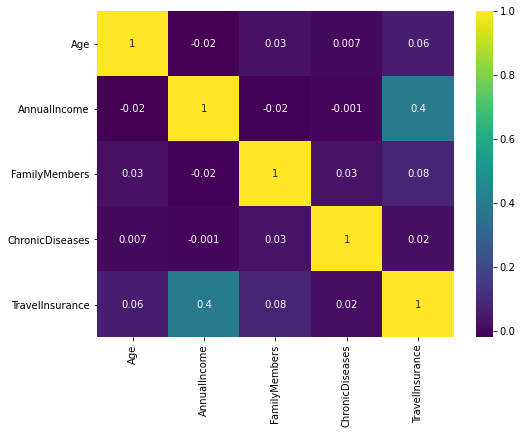

In [7]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True);

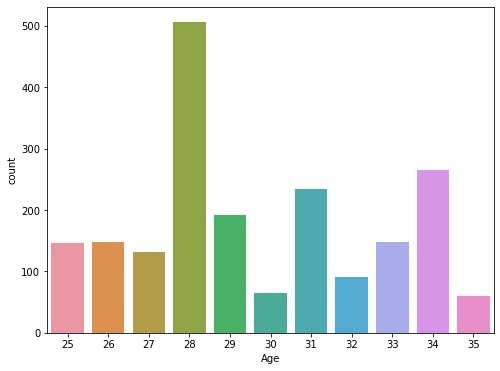

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["Age"]);

Most of the applications are from the people aged 28 and lowest from age 35. Maximum age of the applicant is 35 and the minimum is 25 years.

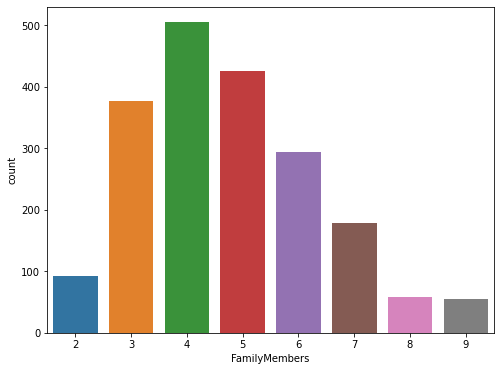

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["FamilyMembers"]);

In [ ]:
Most of the family members count to 4 with lowest being 8 and 9.

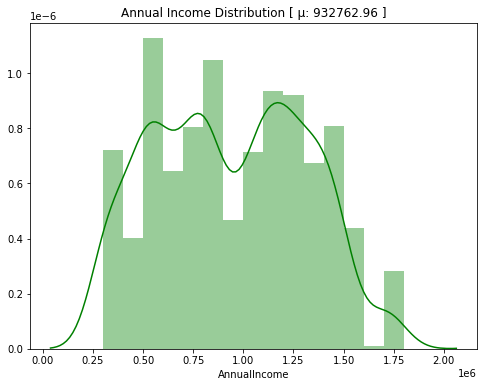

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["AnnualIncome"], color="g")
plt.title(f"Annual Income Distribution [ \u03BC: {df['AnnualIncome'].mean():.2f} ]")
plt.show()

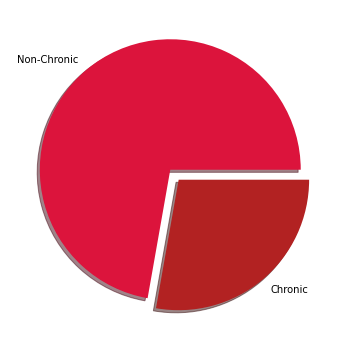

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["ChronicDiseases"].value_counts(), 
        colors=["crimson","firebrick"], 
        labels=["Non-Chronic","Chronic"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.show()

Most of the applicants are Non Frequent Flyers

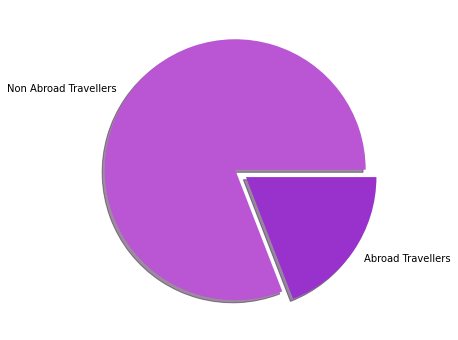

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["EverTravelledAbroad"].value_counts(), 
        colors=["mediumorchid","darkorchid"], 
        labels=["Non Abroad Travellers","Abroad Travellers"], 
        shadow = True, 
        explode = (0, 0.1)
        )
plt.show()

Most of the applicants are Non Abroad Travellers

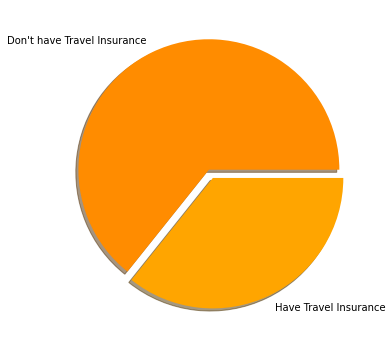

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(x=df["TravelInsurance"].value_counts(), 
        colors=["darkorange","orange"], 
        labels=["Don't have Travel Insurance","Have Travel Insurance"], 
        shadow = True, 
        explode = (0, 0.07)
        )
plt.show()

Most of the flyers don't have a Travel Insurance

# Making the dataset all numerical

In [17]:
# Yes : 1 , No : 0
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})

# Government Sector : 1, Private Sector/Self Employed : 0
df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})

In [18]:
# Having a look at the dataset after the numerical transformation
df.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,400000,6,1,0,0,0
1,31,0,1250000,7,0,0,0,0
2,34,0,500000,4,1,0,0,1
3,28,0,700000,3,1,0,0,0
4,28,0,700000,8,1,1,0,0


# Splitting the data into training and test datasets

Here, we are trying to predict whether the traveller has a Travel Insurance or not using the given data. Hence, the TravelInsurance will be the y label and rest of the data will be the X or the input data

In [19]:
# X data
X = df.drop("TravelInsurance", axis=1)

In [20]:
X.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,400000,6,1,0,0
1,31,0,1250000,7,0,0,0
2,34,0,500000,4,1,0,0
3,28,0,700000,3,1,0,0
4,28,0,700000,8,1,1,0


In [21]:
# y data
y = df["TravelInsurance"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [22]:
# Splitting the data into X train, X test and y train, y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
len(X_train), len(X_test)

(1589, 398)

# Training the Model

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
RandomForestClassifierScore = model.score(X_test,y_test)
RandomForestClassifierScore

0.8090452261306532

In [27]:
print("Accuracy obtained by RandomForestClassifier model:", RandomForestClassifierScore*100)

Accuracy obtained by RandomForestClassifier model: 80.90452261306532


# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [29]:
clf.fit(X_train, y_train)

LogisticRegression()

In [30]:
LogisticRegressionScore = clf.score(X_test,y_test)
LogisticRegressionScore

0.6457286432160804

In [31]:
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 64.57286432160804


# KNeighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(4)

In [33]:
clf1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [34]:
KNeighborsClassifierScore = clf1.score(X_test,y_test)
KNeighborsClassifierScore

0.821608040201005

In [35]:
print("Accuracy obtained by KNeighborsClassifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by KNeighborsClassifier model: 82.1608040201005


# CatBoost Classifier

In [38]:
import catboost

In [39]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 0.5406686	total: 153ms	remaining: 1.38s
1:	learn: 0.4887285	total: 158ms	remaining: 631ms
2:	learn: 0.4661983	total: 162ms	remaining: 378ms
3:	learn: 0.4502142	total: 166ms	remaining: 249ms
4:	learn: 0.4441521	total: 170ms	remaining: 170ms
5:	learn: 0.4361465	total: 173ms	remaining: 115ms
6:	learn: 0.4304888	total: 176ms	remaining: 75.6ms
7:	learn: 0.4246885	total: 179ms	remaining: 44.9ms
8:	learn: 0.4195860	total: 181ms	remaining: 20.1ms
9:	learn: 0.4150837	total: 182ms	remaining: 0us


In [40]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by CatBoost Classifier model: 84.17085427135679


# Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 81.15577889447236


# Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 84.42211055276381


# Comparing performance of the models

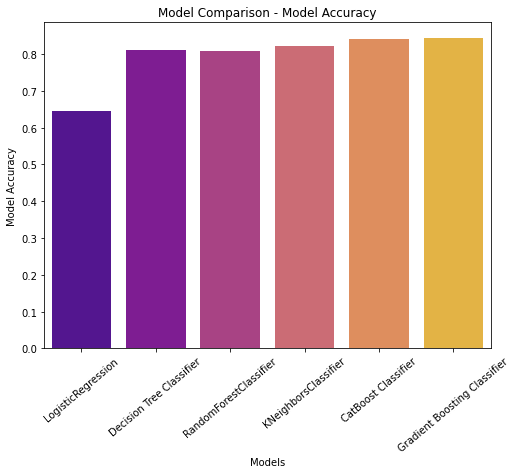

In [49]:
x = ["LogisticRegression", "Decision Tree Classifier", "RandomForestClassifier", "KNeighborsClassifier", "CatBoost Classifier", "Gradient Boosting Classifier"]
y = [LogisticRegressionScore, DecisionTreeClassifierScore, RandomForestClassifierScore, KNeighborsClassifierScore, CatBoostClassifierScore, GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="plasma");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy");